# Drosophila Gene Transcript Expression Visualization
### by Hayley Reynolds

## Project Description: 
#### FlyBase is an free online bioinformatics database and the primary repository of genetic and molecular data for Drosophilidae insect family. All data is available to access and includes mutant phenotypes, molecular characterization of mutant alleles, cytological maps, wild-type expression patterns, anatomical images, transgenic constructs and insertions, sequence-level gene models and molecular classification of gene product functions. This project is focused on parsing through the gene expression files and plotting the data in order to provide improved data visualization of expression levels under different stages of development and in different tissues.

## Current status of expression data visualization

### Stage
![Picture1](https://user-images.githubusercontent.com/47371170/57148481-b3783680-6d97-11e9-96de-bf4b74501a75.png)
### Tissue 
![Picture2](https://user-images.githubusercontent.com/47371170/57149451-c12ebb80-6d99-11e9-82b4-7e099aa86e83.png)

## Step 1: Import relevant modules and define variables

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
filename = 'gene_rpkm_report_fb_2019_02.tsv'
genename = 'FBgn0031682'


## Step 2: Read in tsv file
### Skip rows with text
### tab delineate 

In [3]:
df = pd.read_csv(filename, skiprows=5, sep='\t')


## Step 3: Drop unnecessary libraries and extract columns of interest

In [4]:
df = df.drop(df[df.Parent_library_name == 'BCM_1_RNAseq'].index)
df = df.drop(df[df.Parent_library_name == 'modENCODE_mRNA-Seq_tissues'].index)
df = df.drop(df[df.Parent_library_name == 'modENCODE_mRNA-Seq_treatments'].index)
df = df.drop(df[df.Parent_library_name == 'modENCODE_mRNA-Seq_cell.B'].index)
df = df.drop(df[df.Parent_library_name == 'Knoblich_Neural_Cell_RNA-Seq'].index)


In [5]:
RNAseq = df[['FBgn#', 'RNASource_name', 'RPKM_value']]

## Step 4: Generate function to identify rows specific to your gene of interest

In [10]:
def find_gene(genename):
    df = RNAseq.loc[RNAseq['FBgn#'] == genename]
    return df


## Step 5: Utilize function and inspect returned data frame

In [7]:
data = find_gene(genename)
print(data.head)


<bound method NDFrame.head of               FBgn#          RNASource_name  RPKM_value
547916  FBgn0031681         mE_mRNA_em0-2hr        37.0
547917  FBgn0031681         mE_mRNA_em2-4hr        10.0
547918  FBgn0031681         mE_mRNA_em4-6hr        12.0
547919  FBgn0031681         mE_mRNA_em6-8hr        26.0
547920  FBgn0031681        mE_mRNA_em8-10hr        33.0
547921  FBgn0031681       mE_mRNA_em10-12hr        32.0
547922  FBgn0031681       mE_mRNA_em12-14hr        35.0
547923  FBgn0031681       mE_mRNA_em14-16hr        26.0
547924  FBgn0031681       mE_mRNA_em16-18hr        36.0
547925  FBgn0031681       mE_mRNA_em18-20hr        27.0
547926  FBgn0031681       mE_mRNA_em20-22hr        12.0
547927  FBgn0031681       mE_mRNA_em22-24hr        14.0
547928  FBgn0031681              mE_mRNA_L1        15.0
547929  FBgn0031681              mE_mRNA_L2        20.0
547930  FBgn0031681         mE_mRNA_L3_12hr        12.0
547931  FBgn0031681        mE_mRNA_L3_PS1-2        11.0
547932  FBgn003168

## Plot data in bar plot 

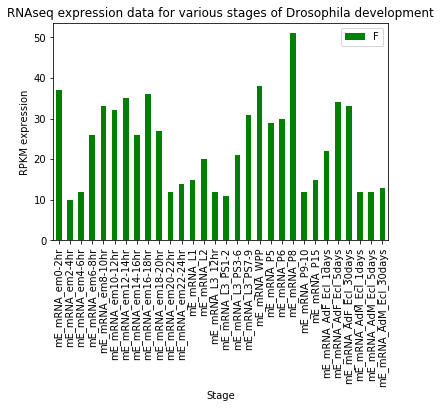

In [11]:
data.plot(kind='bar', x= 'RNASource_name', y= 'RPKM_value', color='g')
plt.xlabel('Stage')
plt.ylabel('RPKM expression')
plt.gca().legend(genename)
plt.title('RNAseq expression data for various stages of Drosophila development')

plt.show()
